<a href="https://colab.research.google.com/github/runnin123/Jeju_Bigdata/blob/master/Jeju_bigdata04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 데이터셋 분리

In [8]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 47.1MB 625kB/s
     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 604kB 19.1MB/s 
     |████████████████████████████████| 3.1MB 26.1MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 296kB 48.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=bf173506fdbbd3a3a4f33474e2e1f5b246e6d3a525268c047d5f54c1dd2147a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-8wr_ui1v/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=e141fd5902e18142f8d5d3b1854440f32585b8d16c632ebad5e2857911711e23
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [1]:
# 사용자 계정 인증
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
# 데이터 불러오기(샘플링 → 10000개)
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'jeju-bigquery-282708'
client = bigquery.Client(project = 'jeju-bigquery-282708')

train = client.query('''
  SELECT 
      * 
  FROM `jeju-bigquery-282708.jeju_bigdata.201901_202003_train` 
  WHERE RAND() < 10000 / (SELECT COUNT(*) FROM `jeju-bigquery-282708.jeju_bigdata.201901_202003_train`)
  ''').to_dataframe()

In [3]:
train

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201912,강원,춘천시,기타 대형 종합 소매업,강원,홍천군,10s,1,1,3,35210,3
1,201906,강원,원주시,비알콜 음료점업,강원,횡성군,20s,2,2,5,54000,6
2,201905,서울,중구,택시 운송업,강원,인제군,20s,2,1,48,935560,134
3,201906,강원,횡성군,슈퍼마켓,강원,춘천시,20s,2,1,9,67100,14
4,201904,강원,원주시,육류 소매업,강원,원주시,20s,2,1,85,1635646,91
...,...,...,...,...,...,...,...,...,...,...,...,...
10024,201903,경남,함안군,한식 음식점업,충북,제천시,60s,1,5,3,24400,4
10025,201909,서울,중구,비알콜 음료점업,충북,단양군,60s,1,5,5,47000,6
10026,201909,경북,상주시,차량용 주유소 운영업,충북,청주시 청원구,60s,1,5,11,599606,11
10027,201912,서울,송파구,비알콜 음료점업,충북,청주시 흥덕구,60s,2,5,3,55800,3


In [4]:
# 데이터 시각화
from pandas_profiling import ProfileReport

profile = ProfileReport(train, title = 'Pandas Profiling Report', explorative = True)
profile.to_notebook_iframe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# 머신러닝, 시각화, 통계 패키지 임포트
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

# 평가 메트릭
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 시각화
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 통계
from scipy import stats
from scipy.stats import norm, skew

In [6]:
# 버전 확인
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.0.5
Numpy : 1.18.5
Scikit-Learn : 0.22.2.post1
seaborn : 0.10.1
matplotlib : 3.2.2
Python 3.6.9


In [7]:
# 날씨 데이터 전처리
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [8]:
data = train.copy()
data = data.fillna('')
print(data['REG_YYMM'].head())

0    201912
1    201906
2    201905
3    201906
4    201904
Name: REG_YYMM, dtype: int64


In [10]:
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)
data.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,강원,춘천시,기타 대형 종합 소매업,강원,홍천군,10s,1,1,3,35210,3,2019,12
1,강원,원주시,비알콜 음료점업,강원,횡성군,20s,2,2,5,54000,6,2019,6
2,서울,중구,택시 운송업,강원,인제군,20s,2,1,48,935560,134,2019,5
3,강원,횡성군,슈퍼마켓,강원,춘천시,20s,2,1,9,67100,14,2019,6
4,강원,원주시,육류 소매업,강원,원주시,20s,2,1,85,1635646,91,2019,4


In [11]:
# 시군구 컬럼 제거
df = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

In [12]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,골프장 운영업,강원,60s,1,5,2019,6,9,1296750,9
1,강원,골프장 운영업,경기,20s,1,1,2019,12,7,212000,7
2,강원,골프장 운영업,경기,30s,1,2,2019,7,7,831840,17
3,강원,골프장 운영업,경기,40s,1,3,2019,8,9,878240,19
4,강원,골프장 운영업,경기,40s,2,3,2019,11,3,176000,4
...,...,...,...,...,...,...,...,...,...,...,...
9597,충북,한식 음식점업,충북,60s,2,5,2019,2,6,301900,11
9598,충북,한식 음식점업,충북,60s,2,5,2019,9,212,10466100,273
9599,충북,화장품 및 방향제 소매업,충북,30s,2,1,2019,7,6,114110,7
9600,충북,화장품 및 방향제 소매업,충북,40s,1,3,2020,1,3,220000,3


In [13]:
# 라벨 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [16]:
dtypes

CARD_SIDO_NM    object
STD_CLSS_NM     object
HOM_SIDO_NM     object
AGE             object
SEX_CTGO_CD      int64
FLC              int64
year             int64
month            int64
CSTMR_CNT        int64
AMT              int64
CNT              int64
dtype: object

In [14]:
encoders

{'AGE': LabelEncoder(),
 'CARD_SIDO_NM': LabelEncoder(),
 'HOM_SIDO_NM': LabelEncoder(),
 'STD_CLSS_NM': LabelEncoder()}

In [15]:
df_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,0,1,0,5,1,5,2019,6,9,1296750,9
1,0,1,1,1,1,1,2019,12,7,212000,7
2,0,1,1,2,1,2,2019,7,7,831840,17
3,0,1,1,3,1,3,2019,8,9,878240,19
4,0,1,1,3,2,3,2019,11,3,176000,4
...,...,...,...,...,...,...,...,...,...,...,...
9597,16,36,16,5,2,5,2019,2,6,301900,11
9598,16,36,16,5,2,5,2019,9,212,10466100,273
9599,16,38,16,2,2,1,2019,7,6,114110,7
9600,16,38,16,3,1,3,2020,1,3,220000,3


### 데이터 셋 분리
test_size : 훈련 데이터, 테스트 데이터로 나누는 비율

random_state : 동일한 학습 / 테스트용 데이터 셋을 생성하기 위해 주어지는 난수 값(실험의 재현성)

shuffle : 데이터를 섞을 것인지를 결정. default = True(효율적인 학습 및 데이터셋 생성)

In [17]:
# 데이터셋 분리 모듈 import
from sklearn.model_selection import train_test_split

# X_data : AMT를 제외한 나머지 값들, y_data : AMT
X_data, y_data = df_num.loc[:, df_num.columns != 'AMT'], df.loc[:, df_num.columns == 'AMT']
y_target = y_data['AMT'] # y_data의 AMT 값을 종속 변수로 설정
X_data = X_data.drop(['CSTMR_CNT', 'CNT'], axis = 1) # 같이 움직이는 변수(CSTMR_CNT, CNT) 제거

# train과 test 비율을 7:3으로 설정, 데이터를 섞은 후 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 126, shuffle = True)


 mu = 2527397.51 and sigma = 18761159.84



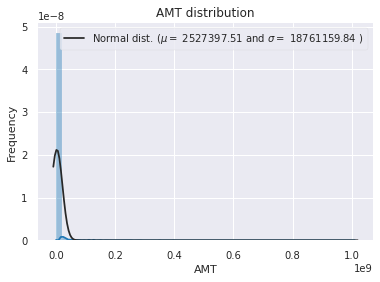

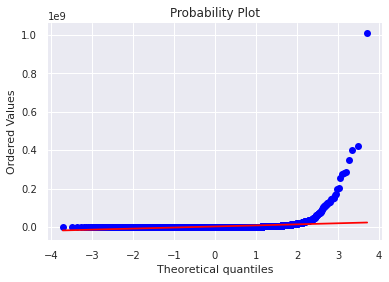

In [18]:
# 종속 변수 모양 확인
sns.distplot(y_train , fit=norm);
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AMT distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 12.65 and sigma = 1.73



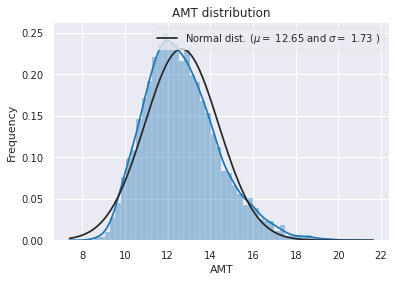

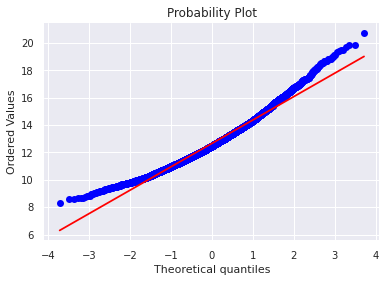

In [19]:
# 종속 변수 정규화
y_train = np.log1p(y_train)

sns.distplot(y_train , fit=norm);
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('AMT distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [20]:
# 하이퍼 파라미터 및 튜닝

# 학습
gbm = GradientBoostingRegressor(n_estimators=4000);
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
# RMSLE 성능 평가

# 함수 생성
def rmsle(y, pred): 
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return print('RMSLE: {0:.3f}'.format(rmsle))

In [22]:
# 예측 및 모형 평가
eval_pred = gbm.predict(X_test) # X_test를 통한 결과값 예측치
eval_pred = np.expm1(eval_pred)
rmsle(y_test, eval_pred) # RMSLE 성능 평가

RMSLE: 1.531


최종 모형을 선정할 때까지 중간 평가 지표로 삼을 것(0에 가까울수록 정밀도가 높음)

In [23]:
# 예측 템플릿 작성
from itertools import product

CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

comb_list = [CARD_SIDO_NMs, STD_CLSS_NMs,HOM_SIDO_NMs, AGEs, SEX_CTGO_CDs, FLCs, years, months]
temp = np.array(list(product(*comb_list)))

train_features = df_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [24]:
# 예측 결과 → 데이터프레임
pred = gbm.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [25]:
# 인코딩 데이터 → 디코딩
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [26]:
temp.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,202004,강원,건강보조식품 소매업,8.086542e+09
1,202004,강원,골프장 운영업,3.164258e+09
2,202004,강원,과실 및 채소 소매업,2.950971e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,6.307806e+07
4,202004,강원,그외 기타 스포츠시설 운영업,3.664231e+07


In [27]:
# Submission 파일 작업 및 내보내기
submission = client.query('''
  SELECT 
    * 
  FROM `jeju-bigquery-282708.jeju_bigdata.submission` 
  ''').to_dataframe()

In [28]:
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission['AMT'] = submission['AMT'].fillna(0)
print(submission.head())

   id  REG_YYMM CARD_SIDO_NM           STD_CLSS_NM           AMT
0   0    202004           강원            건강보조식품 소매업  8.086542e+09
1   1    202004           강원               골프장 운영업  3.164258e+09
2   2    202004           강원           과실 및 채소 소매업  2.950971e+08
3   3    202004           강원     관광 민예품 및 선물용품 소매업  6.307806e+07
4   4    202004           강원  그외 기타 분류안된 오락관련 서비스업  0.000000e+00


In [29]:
submission.to_csv('/content/drive/My Drive/Colab Notebooks/jeju/submission04.csv', encoding='utf-8-sig', index=False)

* raw data에서 랜덤 샘플링을 통한 데이터 추출 → 성능 향상에 큰 의미는 없음

* 종속변수에 로그를 취한 것이 성능향상에 훨씬 좋은 영향이 되었음

성능 향상을 위한 방법)

1. 기존 모형 파라미터

2. 다른 알고리즘 적용

3. 데이터 전처리(EDA)